# Introduction to TensorFlow and Neural Networks

This notebook serves as an introduction to TensorFlow, covering:
1. Understanding Tensors and their importance
2. Basic and advanced tensor operations
3. Building a shallow neural network for real-world classification
4. Best practices in TensorFlow development

## 1. Understanding Tensors

### What is a Tensor?
A tensor is a generalization of vectors and matrices to potentially higher dimensions. Think of it as a container for data with uniform type and shape.

**Tensor Ranks:**
- Rank 0: Scalar (single number)
- Rank 1: Vector (array of numbers)
- Rank 2: Matrix (array of vectors)
- Rank 3+: Higher dimensional tensors

### Why Use Tensors?

1. **Hardware Acceleration**: Tensors can utilize GPU/TPU for parallel processing
2. **Automatic Differentiation**: TensorFlow tracks operations for automatic gradient computation
3. **Batch Processing**: Efficient handling of multiple samples simultaneously
4. **Memory Efficiency**: Optimized data structures for large-scale computations
5. **Unified API**: Consistent interface across different hardware

### Key Tensor Properties

1. **Shape**: Dimensions of the tensor
2. **Dtype**: Data type (float32, int32, etc.)
3. **Device**: Where the tensor is stored (CPU/GPU)
4. **Name**: Optional identifier for the tensor

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers

%matplotlib inline
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.19.0


## 2. Working with Tensors

Let's explore various tensor operations and their properties:

In [2]:
# Creating tensors
scalar = tf.constant(42)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [3]:
v = tf.constant([1, 2, 3, 4])
m = tf.constant([[1, 2], [4, 5]])
# t = 


print('Tensor properties (v):\n')
print(f'Shape of matrix: {v.shape}')
print(f'Rank of matrix: {tf.rank(v)}')
print(f'Dtype of matrix: {v.dtype}')
print(f'Device: {v.device}')

print("\n")

print('Tensor properties (m):\n')
print(f'Shape of matrix: {m.shape}')
print(f'Rank of matrix: {tf.rank(m)}')
print(f'Dtype of matrix: {m.dtype}')
print(f'Device: {m.device}')

Tensor properties (v):

Shape of matrix: (4,)
Rank of matrix: 1
Dtype of matrix: <dtype: 'int32'>
Device: /job:localhost/replica:0/task:0/device:CPU:0


Tensor properties (m):

Shape of matrix: (2, 2)
Rank of matrix: 2
Dtype of matrix: <dtype: 'int32'>
Device: /job:localhost/replica:0/task:0/device:CPU:0


### Tensor Operations

TensorFlow provides a rich set of operations for manipulating tensors:

In [4]:
# Basic arithmetic
print('Addition:', m + m)
print('Multiplication:', m * m)  # Element-wise
print('Matrix multiplication:', tf.matmul(m, m))

# Reshaping
reshaped = tf.reshape(m, [4, 1])
print('Reshaped matrix:', reshaped)

# Transposition
transposed = tf.transpose(m)
print('Transposed matrix:', transposed)

Addition: tf.Tensor(
[[ 2  4]
 [ 8 10]], shape=(2, 2), dtype=int32)
Multiplication: tf.Tensor(
[[ 1  4]
 [16 25]], shape=(2, 2), dtype=int32)
Matrix multiplication: tf.Tensor(
[[ 9 12]
 [24 33]], shape=(2, 2), dtype=int32)
Reshaped matrix: tf.Tensor(
[[1]
 [2]
 [4]
 [5]], shape=(4, 1), dtype=int32)
Transposed matrix: tf.Tensor(
[[1 4]
 [2 5]], shape=(2, 2), dtype=int32)


## 3. Real-World Application: Breast Cancer Classification

Now let's apply our understanding of tensors to build a neural network for breast cancer classification. We'll use the Wisconsin Breast Cancer dataset, which contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

In [5]:
# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('types of X_train:', type(X_train))

# Scale features
scaler = StandardScaler()
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
# Initialize scaler


# Convert to tensors
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

print('Dataset shapes:')
print(f'Training features: {X_train_tensor.shape}')
print(f'Training labels: {y_train_tensor.shape}')
print(f'Test features: {X_test_tensor.shape}')
print(f'Test labels: {y_test_tensor.shape}')

print('Feature names:', data.feature_names)

types of X_train: <class 'numpy.ndarray'>
Dataset shapes:
Training features: (455, 30)
Training labels: (455,)
Test features: (114, 30)
Test labels: (114,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Building the Neural Network

We'll create a shallow neural network with one hidden layer using TensorFlow's Keras API. The architecture will be:
- Input layer: 30 features
- Hidden layer: 16 units with ReLU activation
- Output layer: 1 unit with sigmoid activation

#### Using sequential API

```
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(30,)),
    layers.Dense(1, activation='sigmoid')
])```


#### Using Functional API

In [25]:
def create_model(input_shape, hidden_units=16):
    # Define model architecture
    inputs = tf.keras.Input(shape=input_shape)
    hidden =  tf.keras.layers.Dense(hidden_units, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(1,activation='sigmoid')(hidden)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Create and compile model
model = create_model((X_train_tensor.shape[1],))


# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train model
history = model.fit(
    X_train_tensor,
    y_train_tensor,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6833 - loss: 0.6012 - val_accuracy: 0.8352 - val_loss: 0.5198
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8262 - loss: 0.4814 - val_accuracy: 0.9231 - val_loss: 0.4234
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9018 - loss: 0.3932 - val_accuracy: 0.9231 - val_loss: 0.3571
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9169 - loss: 0.3378 - val_accuracy: 0.9231 - val_loss: 0.3131
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9297 - loss: 0.3055 - val_accuracy: 0.9341 - val_loss: 0.2802
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9512 - loss: 0.2623 - val_accuracy: 0.9451 - val_loss: 0.2546
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9543 - loss: 0.2323 - val_accuracy: 0.9451 - val_loss: 0.2346
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9687 - loss: 0.2156 - val_accuracy: 0.

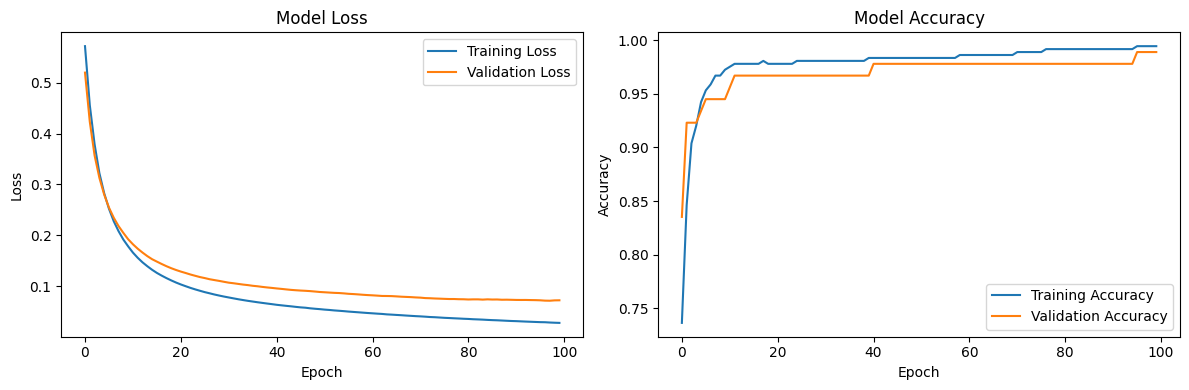

In [28]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# Make predictions
predictions = model.predict(X_test_tensor)
predictions = (predictions > 0.5).astype(int)

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

print('Classification Report:')
print(classification_report(y_test, predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9794 - loss: 0.0906
Test accuracy: 98.25%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[41  2]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



How the Neural Network look if we don't use keras API?

## 4. Key Takeaways

1. **Tensors in TensorFlow**:
   - Fundamental data structure for neural networks
   - Support various operations and automatic differentiation
   - Enable efficient computation on different hardware

2. **Data Preparation**:
   - Feature scaling is crucial for neural networks
   - Converting data to tensors enables GPU acceleration
   - Proper train-test split prevents data leakage

3. **Model Architecture**:
   - Simple architectures can be effective for many tasks
   - Proper initialization and activation functions are important
   - Callbacks help prevent overfitting

4. **Training and Evaluation**:
   - Monitor both training and validation metrics
   - Use appropriate evaluation metrics for the task
   - Consider model interpretability